In [1]:
import xarray as xr
import gcsfs
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ds_faces = xr.open_zarr(gcsfs.GCSMap('pangeo-data/ECCO_chank.zarr'))

In [3]:
#Apply Ryan's code to the dataset
ds_ll=faces_dataset_to_latlon(ds_faces, metric_vector_pairs=[('LaHw3RHO','LaHs3RHO')])

#Exclude 1992 and put the Atlantic in the middle 
ds = (ds_ll.reset_coords(drop=True).roll(i=180, roll_coords=False)).roll(i_g=180, roll_coords=False)

#Make a corresponding dataset of the coordinates of ds, with the same conditions as above(?)
coords = (ds_ll.coords.to_dataset().reset_coords().roll(i=180, roll_coords=False)).roll(i_g=180, roll_coords=False)

In [19]:
#Original Mask
def og(newMask):
    newMask[215:, 0:150] = 0
    newMask[215:, 260:] = 0
    newMask[185:215, :120] = 0
    newMask[185:215, 250:] = 0
    newMask[:185, :145] = 0
    newMask[:185, 245:] = 0
    newMask[115:145, 135:155] = 0
    for j in coords.j[55:125]:
        for i in coords.i[205:245]:
            if j < (7/4)*i - 303.75:
                newMask[j,i] = 0
    return newMask

In [5]:
def new(newMask):
    #mask[ydimension, xdimnesion]
    newMask[215:, 0:147] = 0 #fixes top left pixel
    newMask[215:, 260:] = 0
    newMask[185:215, :120] = 0
    newMask[185:215, 260:] = 0 #right 
    newMask[185:199, 250:] = 0 #right
    newMask[:185, :133] = 0 #responsible for bottom left pixel
    newMask[:180, :141] = 0 #fixse bottom left pixeel 
    newMask[:185, 245:] = 0
    newMask[115:145, 135:155] = 0
    newMask[50:120, 100:154] = 0
    for j in coords.j[55:125]:
        for i in coords.i[205:245]:
            if j < (7/4)*i - 303.75:
                newMask[j,i] = 0
    return newMask

In [19]:
def newer(newMask):
    #mask[ydimension, xdimnesion]
    newMask[215:, 0:147] = 0 #fixes top left pixel
    newMask[215:, 260:] = 0
    newMask[185:215, :120] = 0
    newMask[185:215, 260:] = 0 #right 
    newMask[185:199, 250:] = 0 #right
    newMask[135:155, 135:155] = 0 
    newMask[185:189, 115:131] = 0 ###########################################
    newMask[:185, :133] = 0 #responsible for bottom left pixel
    newMask[:180, :141] = 0 #fixse bottom left pixeel 
    newMask[:185, 245:] = 0
    newMask[115:145, 135:155] = 0
    newMask[50:120, 100:154] = 0
    for j in coords.j[55:125]:
        for i in coords.i[205:245]:
            if j < (7/4)*i - 303.75:
                newMask[j,i] = 0
    return newMask

In [28]:
def new2(newMask):
        #mask[ydimension, xdimnesion]
    newMask[215:, 0:147] = 0 #fixes top left pixel
    newMask[215:, 260:] = 0
    newMask[185:215, :120] = 0
    newMask[185:215, 260:] = 0 #right 
    newMask[185:199, 250:] = 0 #right
    newMask[135:155, 135:155] = 0 
    newMask[185:189, 115:131] = 0 
    newMask[:185, :133] = 0 #responsible for bottom left pixel
    newMask[:179, :141] = 0 #fixse bottom left pixeel 
    #downbelow
    newMask[:185, 245:] = 0
    newMask[115:145, 135:155] = 0
    newMask[50:120, 100:154] = 0
    ###
    #newMask[178:180, 137:143] 
    for j in coords.j[55:125]:
        for i in coords.i[205:245]:
            if j < (7/4)*i - 303.75:
                newMask[j,i] = 0
    return newMask

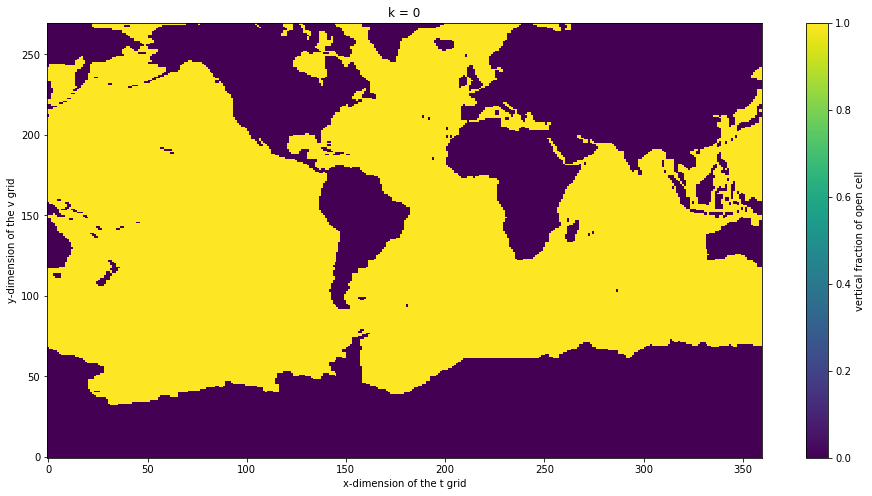

In [25]:
coords.hFacS.isel(k=0).plot(figsize=(16,8))

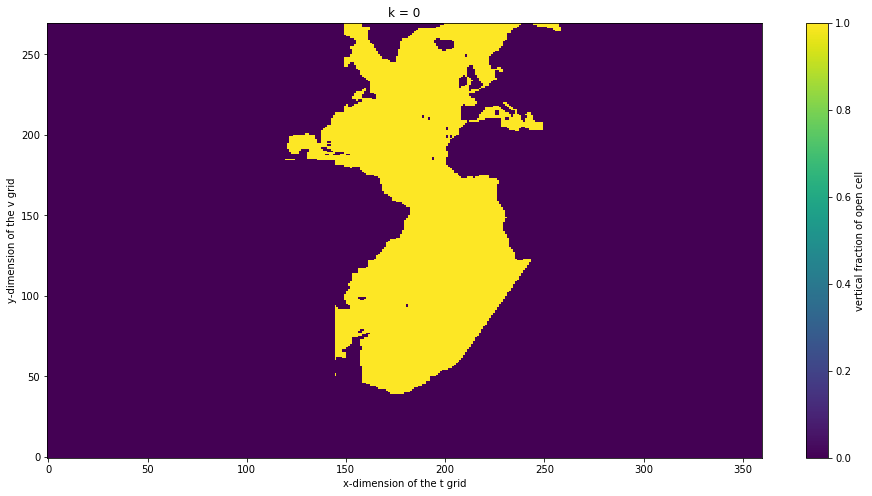

In [8]:
og(coords.hFacS.isel(k=0).load()).plot(figsize=(16,8))

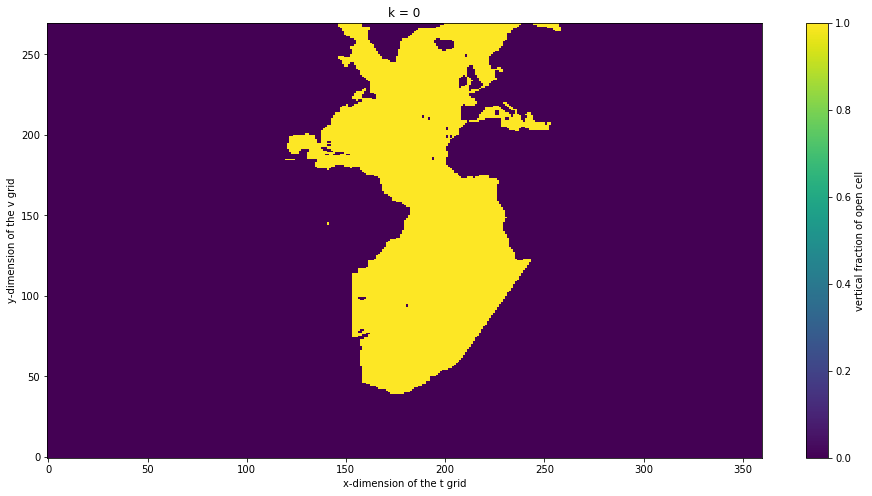

In [9]:
new(coords.hFacS.isel(k=0).load()).plot(figsize=(16,8))

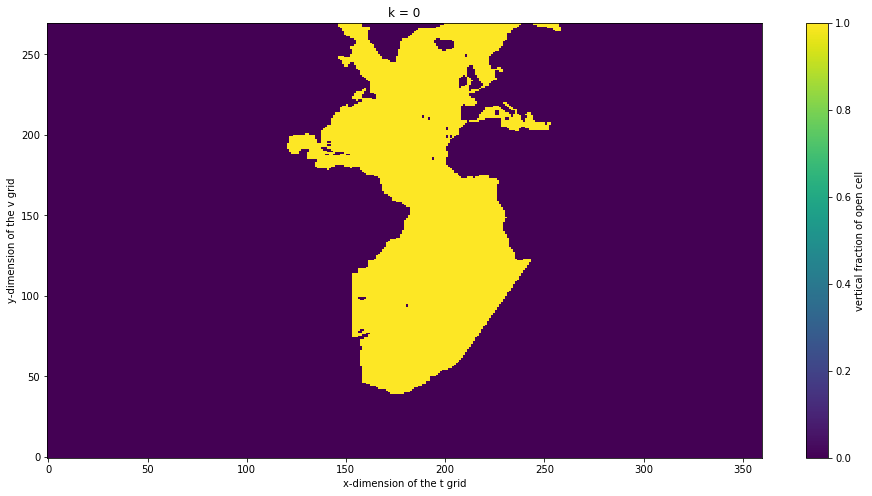

In [10]:
newer(coords.hFacS.isel(k=0).load()).plot(figsize=(16,8))

In [17]:
subtract = coords.hFacS.isel(k=0) - newer(coords.hFacS.isel(k=0).load())

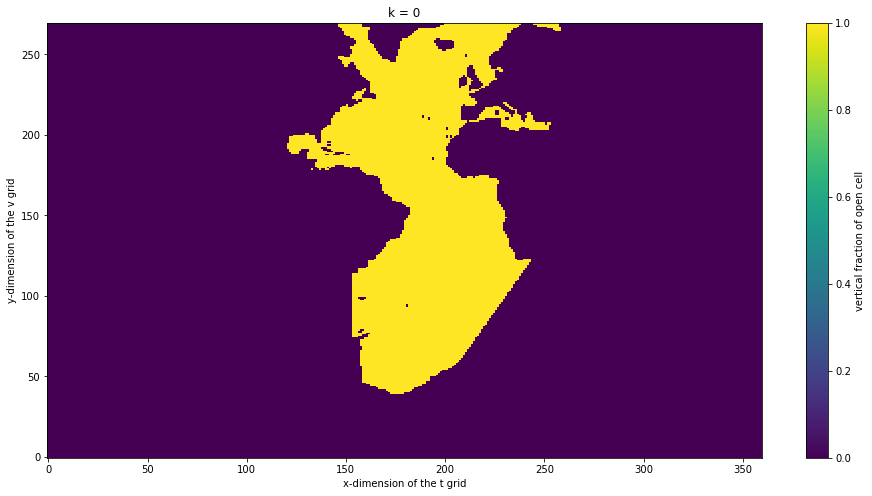

In [29]:
new2(coords.hFacS.isel(k=0).load()).plot(figsize=(16,8))

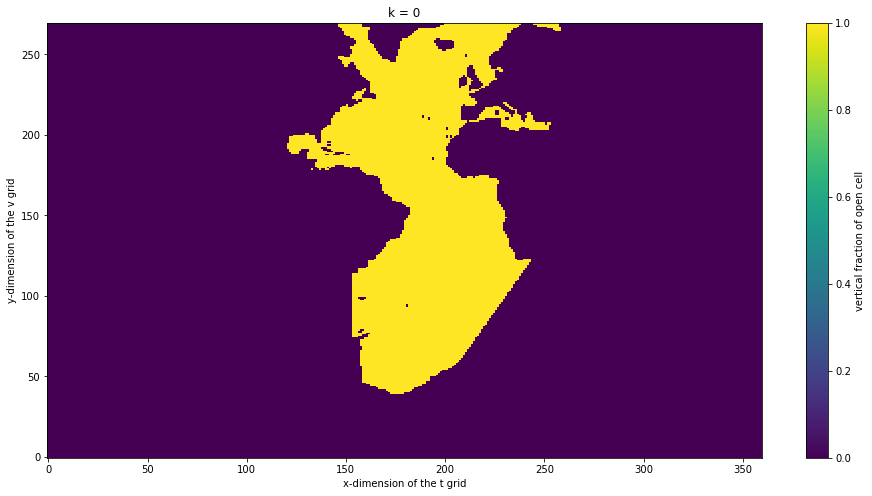

In [30]:
new2(coords.hFacS.isel(k=0).load()).plot(figsize=(16,8))

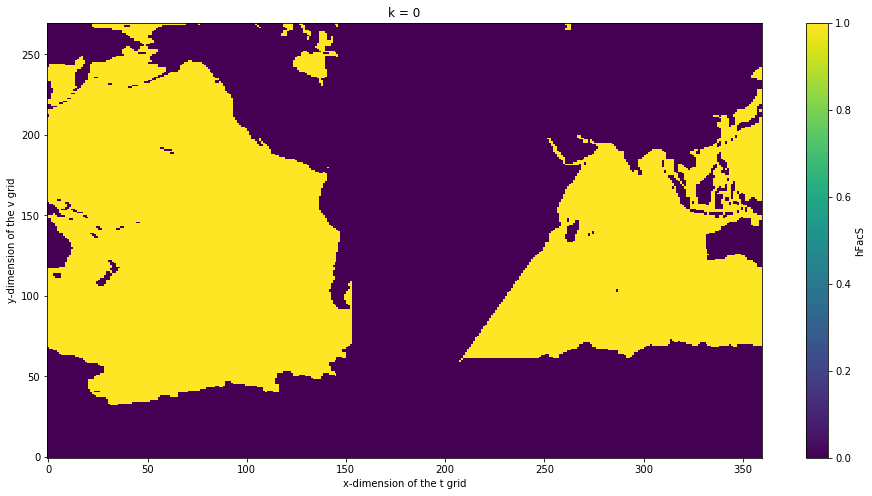

In [32]:
subtract1 = coords.hFacS.isel(k=0) -  new2(coords.hFacS.isel(k=0).load())
#the dots are ocean 
#around it is purple => around it is 0
#its under the litttle tongue of north america 
#the bottom square is not high enough 
subtract1.plot(figsize=(16,8))

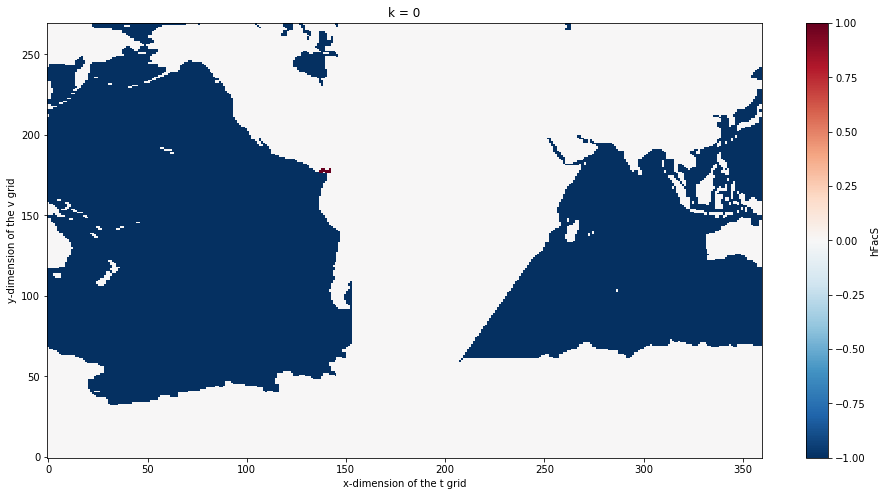

In [43]:
subtract2 =  new2(coords.hFacS.isel(k=0).load()) - coords.hFacS.isel(k=0)
subtract2.plot(figsize=(16,8))
#make it one conjoined blob 

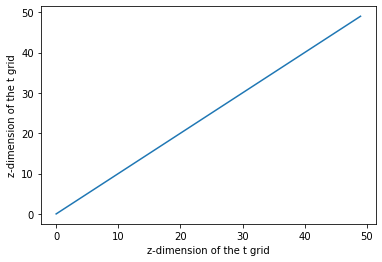